CREDIT CARD FRAUD DETECTION PROJECT

1. Exploratory Data Analysis
2. Feature Engineering
3. Machine learning models such as logistic regression, XGboost, SVC, KNN, AdaBoost, Naive Bayes and Random Forest.
4. Deep learning model
5. Validate and compare the results
6. Detection

1. EXPLORATORY DATA ANALYSIS (EDA)

In [ ]:
# Importing libraries
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import svm, tree
import xgboost
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import pickle
%matplotlib inline
import datetime 
import time 
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Loading the dataset
train  = pd.read_csv('/content/drive/My Drive/Credit Card Fraud Detection Dataset/train.csv')
test  = pd.read_csv('/content/drive/My Drive/Credit Card Fraud Detection Dataset/test.csv')
submission = test[['ID']]

In [ ]:
# Information about the data
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198365 entries, 0 to 198364
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      198365 non-null  int64  
 1   Time    198365 non-null  float64
 2   V1      198365 non-null  float64
 3   V2      198365 non-null  float64
 4   V3      198365 non-null  float64
 5   V4      198365 non-null  float64
 6   V5      198365 non-null  float64
 7   V6      198365 non-null  float64
 8   V7      198365 non-null  float64
 9   V8      198365 non-null  float64
 10  V9      198365 non-null  float64
 11  V10     198365 non-null  float64
 12  V11     198365 non-null  float64
 13  V12     198365 non-null  float64
 14  V13     198365 non-null  float64
 15  V14     198365 non-null  float64
 16  V15     198365 non-null  float64
 17  V16     198365 non-null  float64
 18  V17     198365 non-null  float64
 19  V18     198365 non-null  float64
 20  V19     198365 non-null  float64
 21  V20     19

In [ ]:
# Checking for null values
train.isnull().sum()

ID        0
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
# First 5 entries
train.head()

,ID,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,2,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,3,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,4,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,5,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Last 5 entries
train.tail()

,ID,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
198360,198361,132457.0,-0.474163,1.438815,-0.816746,0.786791,1.067826,-0.207767,1.251817,0.140304,-0.903642,-0.286039,-2.023954,0.161893,0.849049,0.578537,-0.371794,-0.818649,-0.069831,-0.074010,1.127173,0.138080,0.125517,0.527323,-0.272449,-1.027952,0.237013,-0.312190,0.304261,0.170698,54.21,0
198361,198362,132457.0,1.501100,-2.329402,-0.028328,-0.579340,-2.269449,-0.208058,-1.307538,0.083778,0.774633,0.584604,-1.313588,-0.628649,-0.588075,-0.361347,1.050326,-0.595248,-0.276786,1.677379,-1.176233,-0.004024,-0.006746,-0.112426,0.103570,-0.060057,-0.973943,1.226613,-0.080066,0.009990,314.90,0
198362,198363,132458.0,1.957960,-0.677669,-0.395253,0.762448,-0.685747,0.201289,-0.854448,0.198542,1.820618,-0.074209,-1.677822,-0.201107,-1.369715,-0.332396,-0.720134,-0.270247,0.044002,-0.018030,-0.018816,-0.279926,0.199416,0.907851,0.061666,0.730593,0.001207,0.568559,-0.009303,-0.047854,14.39,0
198363,198364,132458.0,-1.135983,-2.150924,-1.078870,-0.922886,-1.936992,0.819695,3.101553,-0.311864,-1.447371,-0.418445,-0.033243,-0.251791,-0.184091,0.453033,-0.587847,-1.307890,-0.691111,2.433242,-0.962958,1.148427,0.522862,0.629329,1.597087,-0.658563,0.298377,-0.101644,-0.198980,0.084730,804.00,0
198364,198365,132458.0,-0.664842,0.635278,1.398580,-0.412006,0.357441,-0.090934,0.804617,0.076064,-0.906568,-0.463076,0.767147,0.129928,-0.394268,0.585601,0.676272,0.233461,-0.464815,0.103909,1.520619,0.243034,-0.380785,-1.374581,0.037338,-0.518470,-0.053920,0.334494,-0.036098,0.054529,61.80,0


In [ ]:
# Datatype of each column
train.dtypes

ID          int64
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [ ]:
# Basic description - statistics
train.describe()

,ID,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000
mean,99183.000000,70130.934414,-0.107339,0.004431,0.325762,0.077514,-0.113668,0.046607,-0.051740,0.017719,0.008831,-0.011421,0.128543,-0.070802,0.038077,0.051707,0.085583,-0.005873,0.027074,-0.036337,-0.013667,0.020095,-0.014966,-0.049185,-0.015766,0.004333,0.061965,0.006424,0.001587,0.001976,89.703525,0.001931
std,57263.187411,34305.103318,1.891453,1.622666,1.446295,1.398805,1.360659,1.310315,1.216025,1.210508,1.136286,1.092769,1.041080,1.095650,1.032460,0.972243,0.944909,0.886107,0.891597,0.839776,0.819089,0.749393,0.738678,0.690646,0.610795,0.603471,0.490441,0.488446,0.394026,0.314154,248.680051,0.043898
min,1.000000,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-25.222345,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,49592.000000,44128.000000,-0.962685,-0.580147,-0.327270,-0.790975,-0.785452,-0.709602,-0.576733,-0.180360,-0.663935,-0.519236,-0.627574,-0.481804,-0.640538,-0.365186,-0.505272,-0.476561,-0.440649,-0.520648,-0.490551,-0.193914,-0.227188,-0.538206,-0.168622,-0.341607,-0.238794,-0.331187,-0.067367,-0.041312,5.990000,0.000000
50%,99183.000000,67005.000000,-0.094105,0.082136,0.496715,0.078139,-0.171469,-0.218506,-0.010989,0.043647,-0.074152,-0.100298,0.067281,0.112894,0.012482,0.075673,0.178439,0.062164,-0.033184,-0.038490,-0.014323,-0.043919,-0.043309,-0.035961,-0.029126,0.052775,0.104492,-0.061019,0.006036,0.018528,22.990000,0.000000
75%,148774.000000,90198.000000,1.213058,0.783763,1.225320,0.889229,0.462401,0.444661,0.499504,0.339098,0.626448,0.442151,0.908819,0.612544,0.710534,0.514037,0.772449,0.530235,0.422128,0.455699,0.469887,0.150298,0.150027,0.421133,0.114667,0.421534,0.384995,0.261761,0.089128,0.078235,79.200000,0.000000
max,198365.000000,132458.000000,2.454930,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,15.594995,23.745136,12.018913,7.848392,4.569009,10.526766,5.784514,6.098529,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [ ]:
# Data dimension
print("Data dimension     :",test.shape)
print("Data size          :",test.size)
print("Number of Row          :",len(test.index))
print("Number of Columns      :",len(test.columns))

Data dimension     : (86442, 31)
Data size          : 2679702
Number of Row          : 86442
Number of Columns      : 31


In [ ]:
class_values=train['Class'].value_counts()
print(class_values)

0    197982
1       383
Name: Class, dtype: int64


In [ ]:
non_fraud_share=class_values[0]/train['Class'].count()*100
fraud_share=class_values[1]/train['Class'].count()*100
print(non_fraud_share)
print(fraud_share)

99.80692158394878
0.19307841605121873


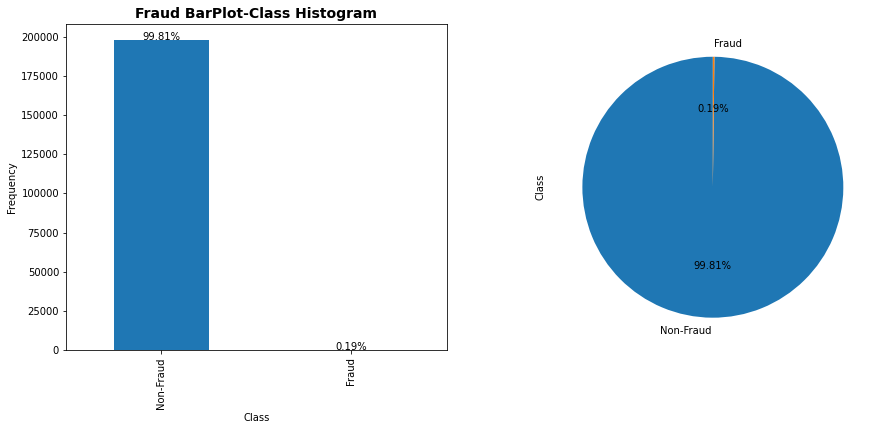

In [ ]:
# Create a bar plot for the number and percentage of fraud vs non-fraud transcations
plt.figure(figsize=(15,6))

plt.subplot(121)
plt.title('Fraud BarPlot-Class Histogram', fontweight='bold',fontsize=14)
count_of_classes = pd.value_counts(train['Class'], sort = True).sort_index()
ax = count_of_classes.plot(kind = 'bar')
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.xticks([0,1],["Non-Fraud","Fraud"])

total = float(len(train))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height*100/total),
            ha="center") 


plt.subplot(122)
labels = 'Non-Fraud', 'Fraud'
train["Class"].value_counts().plot.pie(autopct = "%1.2f%%", labels=labels, startangle=90)
plt.show()


Conclusion : As you can observe data is imbalanced.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


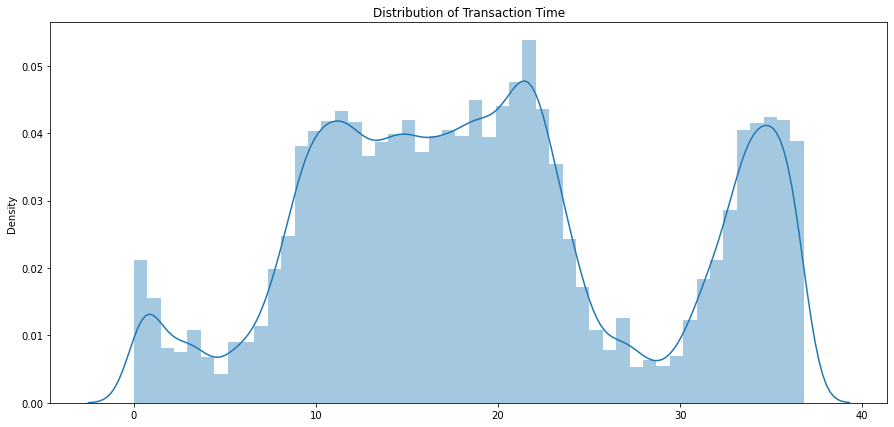

In [ ]:
# Time Distribution plot for transactions 
plt.figure(figsize=(15,7))

plt.title('Distribution of Transaction Time')
sns.distplot(train['Time'].values/(60*60))

Conclusion : Transaction data looks high between 10 and 20, after that it decreases to go lowest at 30 and increases again.


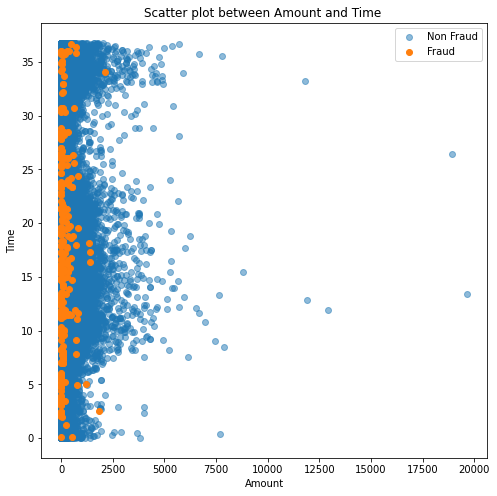

In [ ]:
# Storing both of them seperately
train_non_fraud = train[train.Class==0]
train_fraud = train[train.Class==1]

# Scatter plot between Amount and Time
fig = plt.figure(figsize = (8,8))
plt.scatter(train_non_fraud.Amount, train_non_fraud.Time.values/(60*60),alpha=0.5,label='Non Fraud')
plt.scatter(train_fraud.Amount, train_fraud.Time.values/(60*60),alpha=1,label='Fraud')
plt.xlabel('Amount')
plt.ylabel('Time')
plt.title('Scatter plot between Amount and Time ')
plt.legend()
plt.show()

Conclusion : Most of the fraud transactions involve less amount

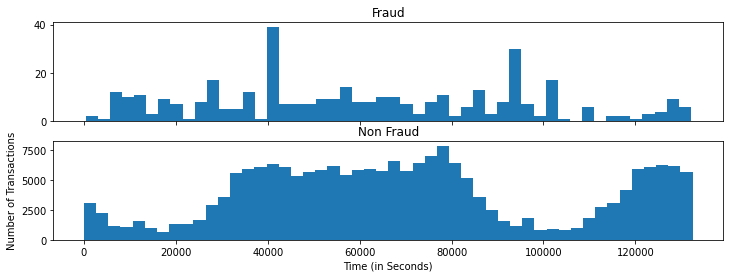

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(train.Time[train.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(train.Time[train.Class == 0], bins = bins)
ax2.set_title('Non Fraud')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

Conclusion : Many fraud transactions have taken place in between time of 40000 seconds and 1000000 seconds

[None, None, None, None]

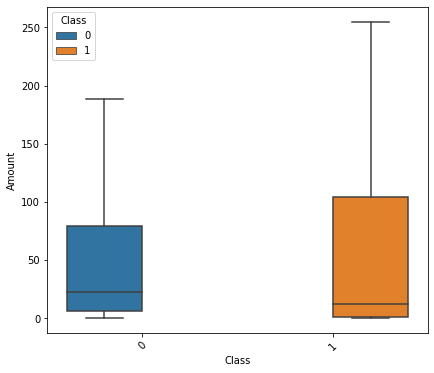

In [ ]:
# Visualizing amount distribution
# Box Plot of amount for both classes
plt.figure(figsize = (15, 6))
plt.subplot(121)
a = sns.boxplot(x = 'Class', y = 'Amount',hue='Class', data = train, showfliers=False) 
plt.setp(a.get_xticklabels(), rotation=45)

Conclusion : Distribution of amount for Fraud transactions is much higher than non-fraud transactions.

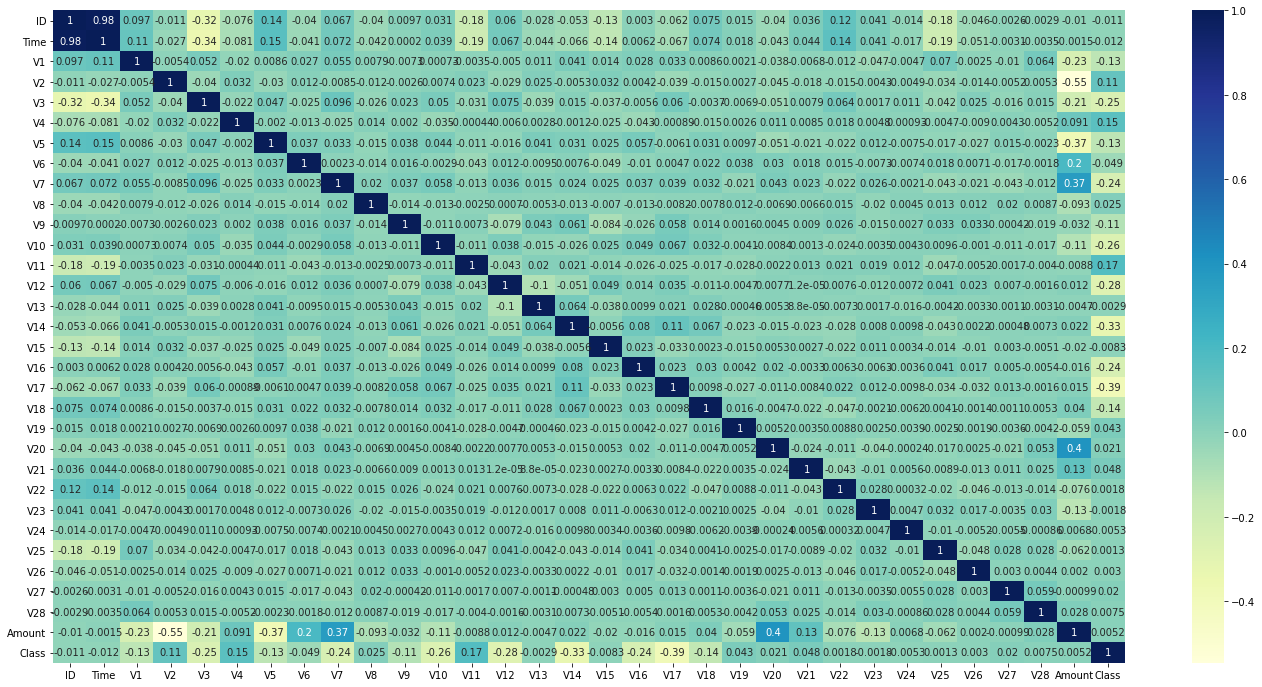

In [ ]:
# Heatmap for visualizing correlation

plt.figure(figsize=(24, 12))
sns.heatmap(train.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
# Understanding more on the correlation in data:
print("Significant features relative to target variable Class")

corr1 = train.corr()['Class']
# convert series to dataframe so it can be sorted
corr1 = pd.DataFrame(corr1)

corr1.columns = ["Correlation"]
# sort correlation
corr2 = corr1.sort_values(by=['Correlation'], ascending=False)
corr2.head(10)

Significant features relative to target variable Class


,Correlation
Class,1.000000
V11,0.171352
V4,0.147454
V2,0.114304
V21,0.048237
V19,0.042972
V8,0.024672
V20,0.021344
V27,0.019514
V28,0.007520


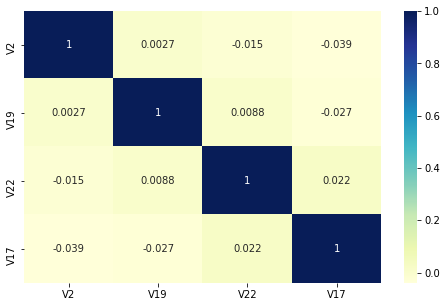

In [ ]:
# Heatmap for relatively strong correlation (i.e. > 0.09) with the target variable:

significant_feature = corr2.index[abs(train.corr()['Class']>0.09)]
plt.subplots(figsize=(8, 5))
significant_corr = train[significant_feature].corr()
sns.heatmap(significant_corr, annot=True, cmap="YlGnBu")
plt.show()

In [ ]:
train.isnull().sum()

ID        0
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Conclusion : No null values

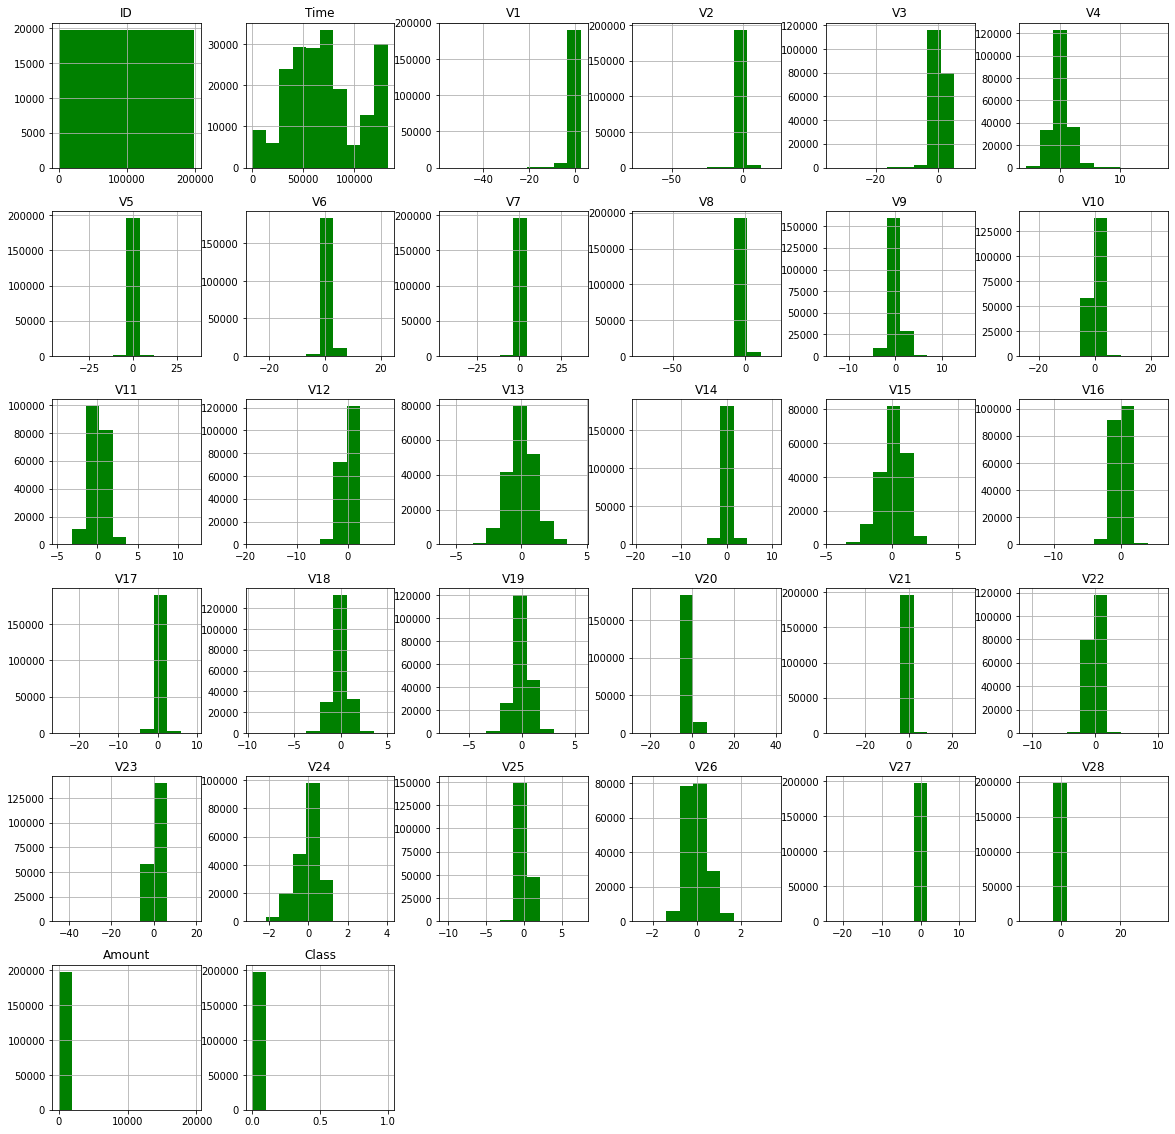

In [ ]:
# As we can see there are no null values

# so let take a look at the spread of each column
# Visulizing the distibution of the data for every feature
train.hist(linewidth=1, histtype='stepfilled', facecolor='g', figsize=(20, 20));

2. FEATURE ENGINEERING

In [ ]:
# Convert time column in bank of hours in a day
# By observing the dataset, we can see there are transaction records of 2days - 48hrs time period
# Hour of transaction is generated in such a way that 1st second of the day is 0 and 86399 is the last second of the day

train['HourBank'] = ((np.where(train['Time'] > 86399 , train['Time'] - 86399 , train['Time'])) % (24 *3600) // 3600).astype(int)
test['HourBank'] = ((np.where(test['Time'] > 86399 , test['Time'] - 86399 , test['Time'])) % (24 *3600) // 3600).astype(int)
train

,ID,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,HourBank
0,1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,2,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0
2,3,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0
3,4,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0
4,5,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198360,198361,132457.0,-0.474163,1.438815,-0.816746,0.786791,1.067826,-0.207767,1.251817,0.140304,-0.903642,-0.286039,-2.023954,0.161893,0.849049,0.578537,-0.371794,-0.818649,-0.069831,-0.074010,1.127173,0.138080,0.125517,0.527323,-0.272449,-1.027952,0.237013,-0.312190,0.304261,0.170698,54.21,0,12
198361,198362,132457.0,1.501100,-2.329402,-0.028328,-0.579340,-2.269449,-0.208058,-1.307538,0.083778,0.774633,0.584604,-1.313588,-0.628649,-0.588075,-0.361347,1.050326,-0.595248,-0.276786,1.677379,-1.176233,-0.004024,-0.006746,-0.112426,0.103570,-0.060057,-0.973943,1.226613,-0.080066,0.009990,314.90,0,12
198362,198363,132458.0,1.957960,-0.677669,-0.395253,0.762448,-0.685747,0.201289,-0.854448,0.198542,1.820618,-0.074209,-1.677822,-0.201107,-1.369715,-0.332396,-0.720134,-0.270247,0.044002,-0.018030,-0.018816,-0.279926,0.199416,0.907851,0.061666,0.730593,0.001207,0.568559,-0.009303,-0.047854,14.39,0,12
198363,198364,132458.0,-1.135983,-2.150924,-1.078870,-0.922886,-1.936992,0.819695,3.101553,-0.311864,-1.447371,-0.418445,-0.033243,-0.251791,-0.184091,0.453033,-0.587847,-1.307890,-0.691111,2.433242,-0.962958,1.148427,0.522862,0.629329,1.597087,-0.658563,0.298377,-0.101644,-0.198980,0.084730,804.00,0,12


In [ ]:
# Hot encoding of the hour banks

# Getting dummies
train_dummies = pd.get_dummies(train['HourBank'])

# Merging it
train = pd.concat([train, train_dummies], axis = 1)

# Dropping redundant columns
train = train.drop(['HourBank','ID','Time'], axis = 1)

train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198360,-0.474163,1.438815,-0.816746,0.786791,1.067826,-0.207767,1.251817,0.140304,-0.903642,-0.286039,-2.023954,0.161893,0.849049,0.578537,-0.371794,-0.818649,-0.069831,-0.074010,1.127173,0.138080,0.125517,0.527323,-0.272449,-1.027952,0.237013,-0.312190,0.304261,0.170698,54.21,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
198361,1.501100,-2.329402,-0.028328,-0.579340,-2.269449,-0.208058,-1.307538,0.083778,0.774633,0.584604,-1.313588,-0.628649,-0.588075,-0.361347,1.050326,-0.595248,-0.276786,1.677379,-1.176233,-0.004024,-0.006746,-0.112426,0.103570,-0.060057,-0.973943,1.226613,-0.080066,0.009990,314.90,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
198362,1.957960,-0.677669,-0.395253,0.762448,-0.685747,0.201289,-0.854448,0.198542,1.820618,-0.074209,-1.677822,-0.201107,-1.369715,-0.332396,-0.720134,-0.270247,0.044002,-0.018030,-0.018816,-0.279926,0.199416,0.907851,0.061666,0.730593,0.001207,0.568559,-0.009303,-0.047854,14.39,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
198363,-1.135983,-2.150924,-1.078870,-0.922886,-1.936992,0.819695,3.101553,-0.311864,-1.447371,-0.418445,-0.033243,-0.251791,-0.184091,0.453033,-0.587847,-1.307890,-0.691111,2.433242,-0.962958,1.148427,0.522862,0.629329,1.597087,-0.658563,0.298377,-0.101644,-0.198980,0.084730,804.00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Similarly for test data
test_dummies = pd.get_dummies(test['HourBank'])
a = list(test_dummies.columns.values)
b = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22, 23]
c = [x for x in b if x not in a]
test_dummies = pd.concat([test_dummies, pd.DataFrame(columns = c)]).fillna(0)  
#lets merge it
test = pd.concat([test, test_dummies], axis = 1)
# then drop the redundant column
test = test.drop(['HourBank','ID','Time'], axis = 1)
test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,2.079192,0.052662,-1.755167,0.418802,0.310472,-0.886053,0.083326,-0.149153,0.721121,-0.334404,-0.867178,-0.655617,-1.401690,-0.554198,0.370880,0.401090,0.538345,-0.109433,0.083219,-0.250318,-0.385564,-1.074903,0.351592,0.441535,-0.300612,0.179993,-0.072265,-0.034296,0.99,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.596563,-1.588177,-1.186718,-1.710578,-0.378661,0.906028,-0.796517,0.443712,2.149723,-0.903409,0.922304,0.636972,-1.332508,0.593003,1.843433,-0.671108,0.003295,-0.103284,-0.134607,0.016012,0.395564,0.993546,-0.024412,-1.613532,-0.392005,-0.055686,0.033064,-0.042575,183.02,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.273454,-1.447207,-0.946779,-1.738063,-1.074172,-0.139592,-1.266807,-0.047025,-1.345062,1.713041,0.122518,-0.157116,0.741846,-0.390753,-0.755528,-0.163992,-0.003366,0.561695,0.302648,-0.384806,-0.142609,0.098889,0.150236,-0.813565,-0.193346,-0.148293,0.020379,-0.063042,21.00,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.987406,0.140840,-2.001286,1.071763,0.717042,-0.880590,0.670095,-0.288313,-0.229202,0.553870,0.455652,0.181500,-1.187533,1.206840,-0.323920,-0.105931,-0.716234,0.248905,-0.018770,-0.274861,0.158934,0.427937,-0.082711,-0.493515,0.434758,-0.473680,-0.045832,-0.075119,35.00,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.398751,1.370313,-0.715049,-0.867699,1.157188,-0.364107,1.151124,-0.316554,0.756304,0.843054,-1.401038,-0.448114,-0.040722,-0.015104,0.688213,-0.410431,-0.818453,0.280538,0.157330,0.475877,0.182382,1.126963,-0.183504,0.047153,-0.570891,-0.222038,0.657472,0.278362,0.89,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86437,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
86438,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
86439,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
86440,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Shuffle dataset
# Balance the data based on column class
g = train.groupby('Class')
g = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))
g = g.reset_index(drop=True)

# shuffle dataset
g = g.sample(frac=1).reset_index(drop=True)

In [ ]:
# Balancing and standardizing the inputs

# The inputs are all columns in the csv, except for the first one [:,0]
# (which is just the arbitrary customer IDs that bear no useful information),
# and the last one [:,-1] (which is our targets)
balanced_inputs = g.drop(['Class'],axis=1)
# The targets are in the last column. That's how datasets are conventionally organized.
balanced_targets = g['Class'].astype(np.int)
unbalanced_inputs = train.drop(['Class'],axis=1)
# The targets are in the last column. That's how datasets are conventionally organized.
unbalanced_targets = train['Class'].astype(np.int)

balanced_inputs = preprocessing.scale(balanced_inputs)
scaled_unbalanced_inputs = preprocessing.scale(unbalanced_inputs)

test_inputsx = preprocessing.scale(test)

shuffled_inputs = balanced_inputs
shuffled_targets = balanced_targets

In [ ]:
# Count the total number of samples
samples_count = shuffled_inputs.shape[0]

# Count the samples in each subset, assuming we want 80-10-10 distribution of training, validation, and test.
# Naturally, the numbers are integers.
train_samples_count = int(0.8 * samples_count)
validation_samples_count = int(0.1 * samples_count)

# The 'test' dataset contains all remaining data.
test_samples_count = samples_count - train_samples_count - validation_samples_count

# Create variables that record the inputs and targets for training
# In our shuffled dataset, they are the first "train_samples_count" observations
train_inputs = shuffled_inputs[:train_samples_count]
train_targets = shuffled_targets[:train_samples_count]

# Create variables that record the inputs and targets for validation.
# They are the next "validation_samples_count" observations, folllowing the "train_samples_count" we already assigned
validation_inputs = shuffled_inputs[train_samples_count:train_samples_count+validation_samples_count]
validation_targets = shuffled_targets[train_samples_count:train_samples_count+validation_samples_count]

# Create variables that record the inputs and targets for test.
# They are everything that is remaining.
test_inputs = shuffled_inputs[train_samples_count+validation_samples_count:]
test_targets = shuffled_targets[train_samples_count+validation_samples_count:]

# We balanced our dataset to be 50-50 (for targets 0 and 1), but the training, validation, and test were 
# taken from a shuffled dataset. Check if they are balanced, too. Note that each time you rerun this code, 
# you will get different values, as each time they are shuffled randomly.
# Normally you preprocess ONCE, so you need not rerun this code once it is done.
# If you rerun this whole sheet, the npzs will be overwritten with your newly preprocessed data.

# Print the number of targets that are 1s, the total number of samples, and the proportion for training, validation, and test.
print(np.sum(train_targets), train_samples_count, np.sum(train_targets) / train_samples_count)
print(np.sum(validation_targets), validation_samples_count, np.sum(validation_targets) / validation_samples_count)
print(np.sum(test_targets), test_samples_count, np.sum(test_targets) / test_samples_count)

316 612 0.5163398692810458
32 76 0.42105263157894735
35 78 0.44871794871794873


In [ ]:
# Splitting the unbalanced into train and test

#Unbalanced datset
train_test_split(scaled_unbalanced_inputs, unbalanced_targets)
# declare 4 variables for the split
x_train1, x_test1, y_train1, y_test1 = train_test_split(scaled_unbalanced_inputs, unbalanced_targets, test_size = 0.25, random_state = 20)

3. Machine Learning models

In [ ]:
# Quick modelling using default parameters

# A list of classifiers will be created and different classification models will be appended to it
classifiers = [] 

model1 = xgboost.XGBClassifier()
classifiers.append(model1)
model2 = svm.SVC()
classifiers.append(model2)
model3 = RandomForestClassifier()
classifiers.append(model3)
model4 = LogisticRegression()
classifiers.append(model4)
model5 = KNeighborsClassifier(3)
classifiers.append(model5)
model6 = AdaBoostClassifier()
classifiers.append(model6)
model7= GaussianNB()
classifiers.append(model7)

In [ ]:
# Fitting the models into an array

for clf in classifiers:
    clf.fit(train_inputs,train_targets)
    y_pred= clf.predict(test_inputs)
    y_tr = clf.predict(train_inputs)
    acc_tr = accuracy_score(train_targets, y_tr)
    acc = accuracy_score(test_targets, y_pred)
    mn = type(clf).__name__
    
    print(clf)
    print("Accuracy of trainset %s is %s"%(mn, acc_tr))
    print("Accuracy of testset %s is %s"%(mn, acc))
    cm = confusion_matrix(test_targets, y_pred)
    print("Confusion Matrix of testset %s is %s"%(mn, cm))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
Accuracy of trainset XGBClassifier is 1.0
Accuracy of testset XGBClassifier is 0.8846153846153846
Confusion Matrix of testset XGBClassifier is [[39  4]
 [ 5 30]]
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Accuracy of trainset SVC is 0.9411764705882353
Accuracy of testset SVC is 0.8974358974358975
Confusion Matrix of tests

4. Deep Learning

In [ ]:
# Modelling

# Converting values into an array
validation_inputs = np.array(validation_inputs)
validation_targets = np.array(validation_targets)
train_targets = np.array(train_targets)
train_inputs = np.array(train_inputs)

In [ ]:
# Set the input and output sizes
input_size = 53
output_size = 2
# Use same hidden layer size for both hidden layers. Not a necessity.
hidden_layer_size = 6
    
# define how the model will look like
model = tf.keras.Sequential([
    # tf.keras.layers.Dense is basically implementing: output = activation(dot(input, weight) + bias)
    # it takes several arguments, but the most important ones for us are the hidden_layer_size and the activation function
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 1st hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
    # the final layer is no different, we just make sure to activate it with softmax
    tf.keras.layers.Dense(output_size, activation='softmax') # output layer
])


### Choose the optimizer and the loss function

# we define the optimizer we'd like to use, 
# the loss function, 
# and the metrics we are interested in obtaining at each iteration
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Training
# That's where we train the model we have built.

# set the batch size
batch_size = 100

# set a maximum number of training epochs
max_epochs = 100

# set an early stopping mechanism
# let's set patience=2, to be a bit tolerant against random validation loss increases
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

# fit the model
# note that this time the train, validation and test data are not iterable
history = model.fit(train_inputs, # train inputs
          train_targets, # train targets
          batch_size=batch_size, # batch size
          epochs=max_epochs, # epochs that we will train for (assuming early stopping doesn't kick in)
          # callbacks are functions called by a task when a task is completed
          # task here is to check if val_loss is increasing
          callbacks=[early_stopping], # early stopping
          validation_data=(validation_inputs, validation_targets), # validation data
          verbose = 2 # making sure we get enough information about the training process
          ) 

Epoch 1/100
7/7 - 1s - loss: 0.7263 - accuracy: 0.4918 - val_loss: 0.6902 - val_accuracy: 0.6053
Epoch 2/100
7/7 - 0s - loss: 0.7039 - accuracy: 0.5098 - val_loss: 0.6819 - val_accuracy: 0.6053
Epoch 3/100
7/7 - 0s - loss: 0.6878 - accuracy: 0.5278 - val_loss: 0.6725 - val_accuracy: 0.5658
Epoch 4/100
7/7 - 0s - loss: 0.6749 - accuracy: 0.5670 - val_loss: 0.6615 - val_accuracy: 0.5921
Epoch 5/100
7/7 - 0s - loss: 0.6636 - accuracy: 0.6046 - val_loss: 0.6525 - val_accuracy: 0.6447
Epoch 6/100
7/7 - 0s - loss: 0.6516 - accuracy: 0.6634 - val_loss: 0.6370 - val_accuracy: 0.7237
Epoch 7/100
7/7 - 0s - loss: 0.6399 - accuracy: 0.7026 - val_loss: 0.6211 - val_accuracy: 0.7632
Epoch 8/100
7/7 - 0s - loss: 0.6280 - accuracy: 0.7369 - val_loss: 0.6041 - val_accuracy: 0.8421
Epoch 9/100
7/7 - 0s - loss: 0.6147 - accuracy: 0.7631 - val_loss: 0.5886 - val_accuracy: 0.8421
Epoch 10/100
7/7 - 0s - loss: 0.6019 - accuracy: 0.7745 - val_loss: 0.5715 - val_accuracy: 0.8553
Epoch 11/100
7/7 - 0s - loss:

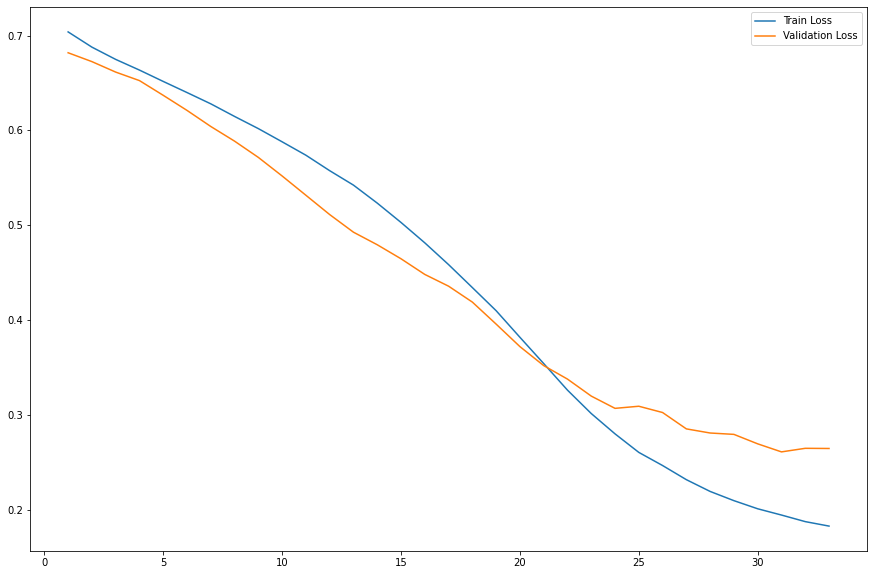

In [ ]:
# Plot the train/validation loss values
plt.figure(figsize=(15,10))
_loss = history.history['loss'][1:]
_val_loss = history.history['val_loss'][1:]

train_loss_plot, = plt.plot(range(1, len(_loss)+1), _loss, label='Train Loss')
val_loss_plot, = plt.plot(range(1, len(_val_loss)+1), _val_loss, label='Validation Loss')

_ = plt.legend(handles=[train_loss_plot, val_loss_plot])

5. Validation

After training on the train data and validating on the validation data, we test the final prediction power of our model by running it on the test dataset that the algorithm has NEVER seen before.

In [ ]:
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)

3/3 [==============================] - 0s 4ms/step - loss: 0.2922 - accuracy: 0.8974


In [ ]:
# Applying deep learning model to the unbalanced dataset

#firstly convert the inputs to array
y_train1 = np.array(y_train1)
y_test1 = np.array(y_test1)

In [ ]:
# Set the input and output sizes
input_size = 53
output_size = 2
# Use same hidden layer size for both hidden layers. Not a necessity.
hidden_layer_size = 2
    
# define how the model will look like
tfk = tf.keras.Sequential([
    # tf.keras.layers.Dense is basically implementing: output = activation(dot(input, weight) + bias)
    # it takes several arguments, but the most important ones for us are the hidden_layer_size and the activation function
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 1st hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
    # the final layer is no different, we just make sure to activate it with softmax
    tf.keras.layers.Dense(output_size, activation='softmax') # output layer
])


### Choose the optimizer and the loss function

# we define the optimizer we'd like to use, 
# the loss function, 
# and the metrics we are interested in obtaining at each iteration
tfk.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Training
# That's where we train the model we have built.

# set the batch size
batch_size = 100

# set a maximum number of training epochs
max_epochs = 100

# set an early stopping mechanism
# let's set patience=2, to be a bit tolerant against random validation loss increases
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

# fit the model
# note that this time the train, validation and test data are not iterable
history = tfk.fit(x_train1, # train inputs
          y_train1, # train targets
          batch_size=batch_size, # batch size
          epochs=max_epochs, # epochs that we will train for (assuming early stopping doesn't kick in)
          # callbacks are functions called by a task when a task is completed
          # task here is to check if val_loss is increasing
          callbacks=[early_stopping], # early stopping
          validation_data=(x_test1, y_test1), # validation data
          verbose = 2 # making sure we get enough information about the training process
          )  

Epoch 1/100
1488/1488 - 3s - loss: 0.3056 - accuracy: 0.9980 - val_loss: 0.1215 - val_accuracy: 0.9983
Epoch 2/100
1488/1488 - 2s - loss: 0.0743 - accuracy: 0.9980 - val_loss: 0.0441 - val_accuracy: 0.9983
Epoch 3/100
1488/1488 - 2s - loss: 0.0332 - accuracy: 0.9980 - val_loss: 0.0234 - val_accuracy: 0.9983
Epoch 4/100
1488/1488 - 2s - loss: 0.0208 - accuracy: 0.9980 - val_loss: 0.0161 - val_accuracy: 0.9983
Epoch 5/100
1488/1488 - 2s - loss: 0.0164 - accuracy: 0.9980 - val_loss: 0.0134 - val_accuracy: 0.9983
Epoch 6/100
1488/1488 - 2s - loss: 0.0150 - accuracy: 0.9980 - val_loss: 0.0126 - val_accuracy: 0.9983
Epoch 7/100
1488/1488 - 2s - loss: 0.0146 - accuracy: 0.9980 - val_loss: 0.0123 - val_accuracy: 0.9983
Epoch 8/100
1488/1488 - 2s - loss: 0.0146 - accuracy: 0.9980 - val_loss: 0.0123 - val_accuracy: 0.9983
Epoch 9/100
1488/1488 - 2s - loss: 0.0146 - accuracy: 0.9980 - val_loss: 0.0123 - val_accuracy: 0.9983
Epoch 10/100
1488/1488 - 2s - loss: 0.0146 - accuracy: 0.9980 - val_loss:

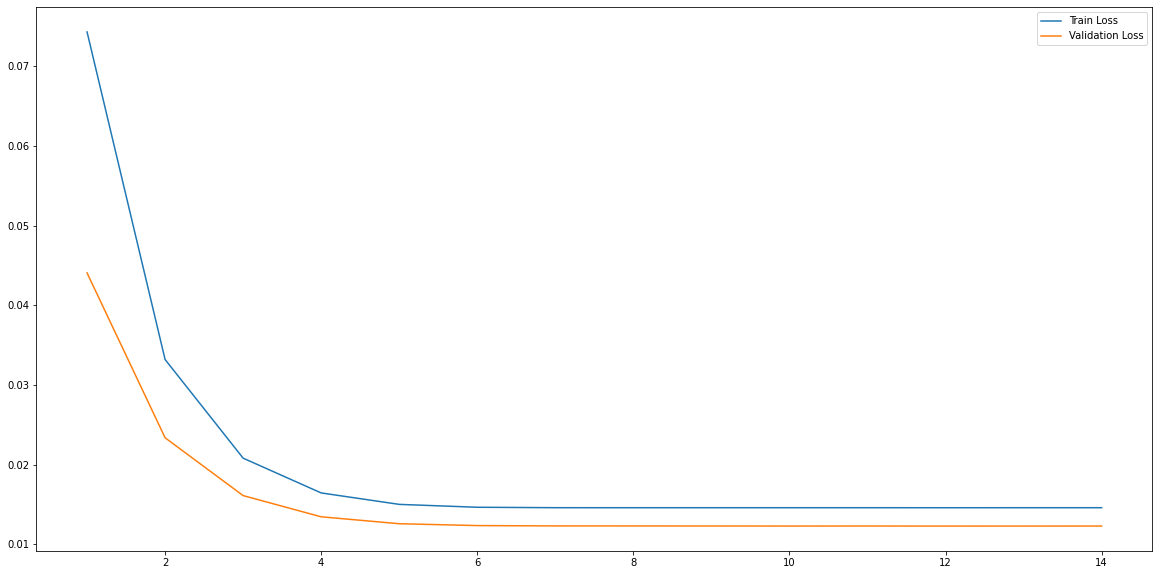

In [ ]:
# Plot the train/validation loss values
plt.figure(figsize=(20,10))
_loss = history.history['loss'][1:]
_val_loss = history.history['val_loss'][1:]

train_loss_plot, = plt.plot(range(1, len(_loss)+1), _loss, label='Train Loss')
val_loss_plot, = plt.plot(range(1, len(_val_loss)+1), _val_loss, label='Validation Loss')

_ = plt.legend(handles=[train_loss_plot, val_loss_plot])

6. Detection

In [ ]:
# Predictions on test data

tfbalanced = model.predict_classes(test_inputsx)   # Deep learning with balanced data
tfunbalanced = tfk.predict_classes(test_inputsx)   # Deep Learning with unbalanced data
xgb = model1.predict(test_inputsx)                 # XGBoost with balanced data
svm = model2.predict(test_inputsx)                 # SVM with balanced data
rf = model3.predict(test_inputsx)                  # Random forest with balanced data
logreg = model4.predict(test_inputsx)              # Logistic regression with balanced data
knn = model5.predict(test_inputsx)                 # KNearest Neighbors with balanced data
ada = model6.predict(test_inputsx)                 # Adaboost with balanced data
nb = model7.predict(test_inputsx)                  # Naive Bayes with balanced data

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
submission['tfb'] = tfbalanced          
submission['tfu'] = tfunbalanced
submission['xgb'] = xgb
submission['svm'] = svm
submission['rfc'] = rf        
submission['logr'] = logreg
submission['knn'] = knn             
submission['ada'] = ada
submission['nbc'] = nb
submission

,ID,tfb,tfu,xgb,svm,rfc,logr,knn,ada,nbc
0,198366,1,0,1,1,1,1,1,1,1
1,198367,1,0,0,1,1,1,1,0,1
2,198368,1,0,0,1,1,1,0,1,1
3,198369,1,0,1,1,1,1,1,1,1
4,198370,1,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
86437,284803,0,0,0,1,0,0,1,0,1
86438,284804,1,0,1,1,1,1,0,1,1
86439,284805,1,0,1,1,1,1,0,1,1
86440,284806,1,0,1,1,1,1,1,1,1
